In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np
from shapely.geometry import Point


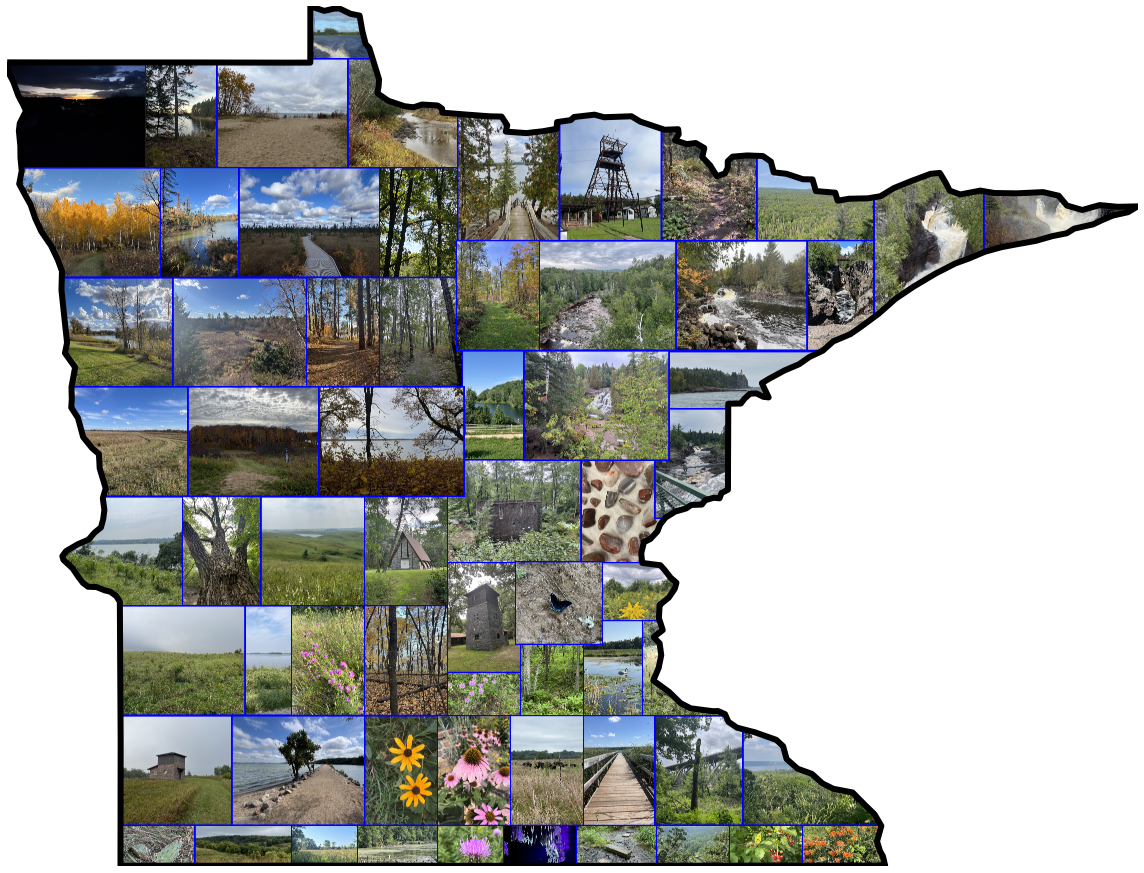

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
from shapely.geometry import Point
from shapely.affinity import scale
from matplotlib.path import Path

#import pillow_heif
#pillow_heif.register_heif_opener()

# --- Load Minnesota polygon ---
gdf = gpd.read_file("cb_2022_us_state_20m/cb_2022_us_state_20m.shp")
mn = gdf[gdf['NAME'] == 'Minnesota']
mn_shape = mn.geometry.values[0]


# --- Optional: vertically stretch the state ---
stretch_factor = 1.0
mn_shape = scale(mn_shape, xfact=1.0, yfact=stretch_factor, origin='center')

# --- Plotting mask function ---
def get_mn_mask(polygon, extent, img_shape):
    xmin, xmax, ymin, ymax = extent
    h, w = img_shape[:2]

    x = np.linspace(xmin, xmax, w)
    y = np.linspace(ymin, ymax, h)
    xv, yv = np.meshgrid(x, y)
    coords = np.column_stack((xv.ravel(), yv.ravel()))

    if polygon.geom_type == 'MultiPolygon':
        paths = [Path(np.array(poly.exterior.coords)) for poly in polygon.geoms]
        mask = np.any([path.contains_points(coords) for path in paths], axis=0)
    else:
        path = Path(np.array(polygon.exterior.coords))
        mask = path.contains_points(coords)

    return mask.reshape((h, w))

# --- Your manually defined image entries ---
# This is a sample with 2 entries — add 73 in total
image_entries = [
    {"path": "stateparkimages/gardenisland.jpeg","x": -95,"y": 49.2,"width_map": 1},
    
    {"path": "stateparkimages/lakebronson.jpeg","x": -96.73,"y": 48.65,"width_map": 1},
    {"path": "stateparkimages/hayeslake.jpeg","x": -96,"y": 48.65,"width_map": 0.57},
    {"path": "stateparkimages/zippelbay.jpeg","x": -95.3,"y": 48.65,"width_map": 1},
    {"path": "stateparkimages/franzjevne.jpeg","x": -94.4,"y": 48.65,"width_map": 1},
    
    
    
    {"path": "stateparkimages/oldmill.jpeg","x": -96.65,"y": 47.9,"width_map": 1},
    {"path": "stateparkimages/lakebemidji.jpeg","x": -95.9,"y": 47.9,"width_map": 0.57},
    {"path": "stateparkimages/bigbog.jpeg","x": -95.15,"y": 47.9,"width_map": 1},
    {"path": "stateparkimages/schoolcraft.jpeg","x": -94.4,"y": 47.9,"width_map": 0.57},
    
    {"path": "stateparkimages/scenic.jpeg","x": -93.8,"y": 48.2,"width_map": 0.7},
    {"path": "stateparkimages/soudan.jpeg","x": -93.1,"y": 48.2,"width_map": 0.7},
    {"path": "stateparkimages/bearheadlake.jpeg","x": -92.4,"y": 48.2,"width_map": 0.7},
    {"path": "stateparkimages/cascaderiver.jpeg","x": -91.6,"y": 48.05,"width_map": 1},
    
    {"path": "stateparkimages/cuyunacountry.jpeg","x": -93.8,"y": 46.65,"width_map": 1},
    
    {"path": "stateparkimages/tempranceriver.jpeg","x": -91.5,"y": 47.4,"width_map": 0.57},
    {"path": "stateparkimages/judgecrmagney.jpeg","x": -90.8,"y": 47.9,"width_map": 1},
    {"path": "stateparkimages/grandportage.jpeg","x": -90.05,"y": 47.9,"width_map": 1},
    {"path": "stateparkimages/georgemanitou.jpeg","x": -92.25,"y": 47.4,"width_map": 1},
    {"path": "stateparkimages/tettegouche.jpeg","x": -93.15,"y": 47.4,"width_map": 1},
    
    {"path": "stateparkimages/redriver.jpeg","x": -96.5,"y": 47.15,"width_map": 1},
    {"path": "stateparkimages/lasalle.jpeg","x": -95.6,"y": 47.15,"width_map": 1},
    {"path": "stateparkimages/itasca.jpeg","x": -94.9,"y": 47.15,"width_map": 0.57},
    {"path": "stateparkimages/mccarthybeach.jpeg","x": -94.4,"y": 47.15,"width_map": 0.57},
    {"path": "stateparkimages/savannaportage.jpeg","x": -93.87,"y": 47.4,"width_map": 0.57},
    
    
    {"path": "stateparkimages/mooselake.jpeg","x": -93.,"y": 45.9,"width_map": 0.7},
    {"path": "stateparkimages/banning.jpeg","x": -93.8,"y": 45.9,"width_map": 1},
    {"path": "stateparkimages/buffaloriver.jpeg","x": -96.4,"y": 46.4,"width_map": 1},
    {"path": "stateparkimages/maplewood.jpeg","x": -95.5,"y": 46.4,"width_map": 1},
    {"path": "stateparkimages/glendalough.jpeg","x": -94.6,"y": 46.4,"width_map": 1},
    
    
    {"path": "stateparkimages/bigstonelake.jpeg","x": -96.5,"y": 45.65,"width_map": 1},
    {"path": "stateparkimages/lacquiparle.jpeg","x": -95.75,"y": 45.65,"width_map": 0.57},
    {"path": "stateparkimages/glaciallakes.jpeg","x": -95.,"y": 45.65,"width_map": 1},
    
    {"path": "stateparkimages/millelacskathio.jpeg","x": -93.5,"y": 44.8,"width_map": 0.57},
    {"path": "stateparkimages/stcroix.jpeg","x": -92.9,"y": 45.2,"width_map": 0.57},
    {"path": "stateparkimages/lakemaria.jpeg","x": -94.,"y": 44.8,"width_map": 0.57},
    {"path": "stateparkimages/williamobrien.jpeg","x": -93.,"y": 44.8,"width_map": 0.57},
    {"path": "stateparkimages/afton.jpeg","x": -92.6,"y": 44.8,"width_map": 0.57},
    {"path": "stateparkimages/charleslindberg.jpeg","x": -94,"y": 45.2,"width_map": 0.57},
    {"path": "stateparkimages/crowwing.jpeg","x": -94.5,"y": 45.65,"width_map": 0.57},
    {"path": "stateparkimages/wildriver.jpeg","x": -93.45,"y": 45.3,"width_map": 0.6},
    
    
    {"path": "stateparkimages/splitrocklighthouse.jpeg","x": -92.2,"y": 46.82,"width_map": 1.1},
    {"path": "stateparkimages/jaycooke.jpeg","x": -92.3,"y": 46.25,"width_map": 1},
    {"path": "stateparkimages/gooseberry.jpeg","x": -93.2,"y": 46.65,"width_map": 1},
    
    
    {"path": "stateparkimages/monsonlake.jpeg","x": -95.5,"y": 44.9,"width_map": 1},
    {"path": "stateparkimages/sibley.jpeg","x": -95.,"y": 44.9,"width_map": 0.57},
    {"path": "stateparkimages/lakecarlos.jpeg","x": -94.5,"y": 44.9,"width_map": 0.57},
    {"path": "stateparkimages/camden.jpeg","x": -96.1,"y": 44.9,"width_map": 1},
    
    
    {"path": "stateparkimages/bluemounds.jpeg","x": -96.2,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/kilenwoods.jpeg","x": -95.45,"y": 43.6,"width_map": 1},
    {"path": "stateparkimages/sakatahlake.jpeg","x": -95.,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/myrebigisland.jpeg","x": -94.55,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/lakelouise.jpeg","x": -94,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/forestville.jpeg","x": -93.55,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/carley.jpeg","x": -93.05,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/whitewater.jpeg","x": -92.5,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/beavercreekvalley.jpeg","x": -92.,"y": 43.6,"width_map": 0.57},
    {"path": "stateparkimages/greatriverbluffs.jpeg","x": -91.5,"y": 43.6,"width_map": 0.57},
    
    
    {"path": "stateparkimages/splitrockcreek.jpeg","x": -96.1,"y": 44.15,"width_map": 1},
    {"path": "stateparkimages/lakeshetek.jpeg","x": -95.2,"y": 44.15,"width_map": 1},
    {"path": "stateparkimages/fortridgley.jpeg","x": -94.5,"y": 44.15,"width_map": 0.57},
    {"path": "stateparkimages/flandrau.jpeg","x": -94,"y": 44.15,"width_map": 0.57},
    {"path": "stateparkimages/minneopa.jpeg","x": -93.5,"y": 44.15,"width_map": 0.57},
    {"path": "stateparkimages/ricelake.jpeg","x": -93.,"y": 44.15,"width_map": 0.57},
    {"path": "stateparkimages/fortsnelling.jpeg","x": -92.3,"y": 44.15,"width_map": 1},
    {"path": "stateparkimages/frontenac.jpeg","x": -91.7,"y": 44.15,"width_map": 1},
    

    
    
    
    ###{"path": "stateparkimages/fatherhennepin.jpeg","x": -91.7,"y": 44.15,"width_map": 1},
    #{"path": "stateparkimages/.jpeg","x": -94.56,"y": 48.27,"width_map": 1},
    # ... add 71 more48.747648515087256, -96.71293885561788
]

# --- Setup plot ---
minx, miny, maxx, maxy = mn_shape.bounds
fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_aspect('equal')
ax.axis('off')

# --- Draw Minnesota outline ---
gpd.GeoSeries(mn_shape).boundary.plot(ax=ax, color='black', linewidth=6)

# --- Loop over each image entry ---
for entry in image_entries:
    x = entry["x"]
    y = entry["y"]
    width_map = entry["width_map"]

    # Load image
    pil_img = Image.open(entry["path"]).convert("RGBA")
    pil_img = ImageOps.expand(pil_img, border=45, fill='blue')  # optional border

    img_arr = np.array(pil_img)
    img_h, img_w = img_arr.shape[:2]
    aspect_ratio = img_h / img_w

    height_map = width_map * aspect_ratio

    # Compute extent (map space)
    extent = (
        x - width_map / 2,
        x + width_map / 2,
        y - height_map / 2,
        y + height_map / 2
    )

    # Flip image vertically for matplotlib
    img_flipped = np.flipud(img_arr)

    # Clip to Minnesota
    mask = get_mn_mask(mn_shape, extent, img_flipped.shape)
    img_masked = img_flipped.copy()
    img_masked[..., 3] *= mask.astype(np.uint8)

    # Show
    ax.imshow(img_masked, extent=extent, origin='lower')

    

# Example label data — add as many as you want
text_labels = [
    {"lat": 47.0, "lon": -94.5, "text": " "},
    #{"lat": 45.3, "lon": -92.8, "text": "Label 2"},
    # ...
]

# Plot text after plotting images and MN outline
for label in text_labels:
    ax.text(
        label["lon"], label["lat"], label["text"],
        fontsize=25,
        ha='center',
        va='center',
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0., boxstyle='round,pad=0.2')
    )
plt.tight_layout()
plt.show()


In [3]:
48.65-47.9

0.75